### **Import Libraries**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

### **Load the dataset**

In [19]:
print("----------------------------------------------------")
print("Load the dataset")
print("----------------------------------------------------")
print()
heart_data = pd.read_csv("/content/heart_disease_data.csv")
print(heart_data.head(15))

----------------------------------------------------
Load the dataset
----------------------------------------------------

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1     

### **Handling Missing Values**

In [20]:
print("\n----------------------------------------------------")
print("Handling Missing Values")
print("----------------------------------------------------")
print()
print("Before Handling Missing values:")
print(heart_data.isnull().sum())
heart_data = heart_data.fillna(0)

print("\nAfter Handling Missing Values:")
print(heart_data.isnull().sum())


----------------------------------------------------
Handling Missing Values
----------------------------------------------------

Before Handling Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

After Handling Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### **Label Encoding**

In [21]:
print("\n----------------------------------------------------")
print("Label Encoding")
print("----------------------------------------------------")
print()

if 'sex' in heart_data.columns:
    print("Before Label Encoding:")
    print(heart_data['sex'].head(10))

    label_encoder = LabelEncoder()
    heart_data['sex'] = label_encoder.fit_transform(heart_data['sex'])

    print("\nAfter Label Encoding:")
    print(heart_data['sex'].head(10))
else:
    print("No 'sex' column found in the dataset.")

Label = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in Label:
    if col in heart_data.columns:
        heart_data[col] = label_encoder.fit_transform(heart_data[col])
    else:
        print(f"No '{col}' column found in the dataset.")



----------------------------------------------------
Label Encoding
----------------------------------------------------

Before Label Encoding:
0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    1
9    1
Name: sex, dtype: int64

After Label Encoding:
0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    1
9    1
Name: sex, dtype: int64


### **Distribution of Target Variable**

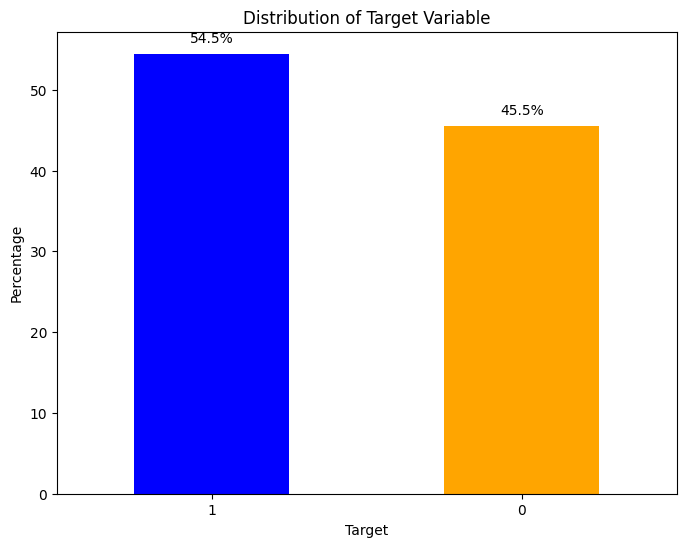

In [22]:
import matplotlib.pyplot as plt

target_counts = heart_data['target'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = target_counts.plot(kind='bar', color=['blue', 'orange'])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 1,
             f'{bar.get_height():.1f}%',
             ha='center',
             va='bottom')

plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

### **Feature Selection**

In [23]:
print("\n----------------------------------------------------")
print("Feature Selection")
print("----------------------------------------------------")
print()

X = heart_data.drop(columns=['target'])
y = heart_data['target']

chi_squ = SelectKBest(chi2, k=10)
best_features = chi_squ.fit_transform(X, y)

print("Total no of original Features:", X.shape[1])
print("Total no of reduced Features:", best_features.shape[1])
print()
selected_indices = chi_squ.get_support(indices=True)

selected_features = X.columns[selected_indices]

print("Selected Features:")
for feature in selected_features:
    print(feature)


----------------------------------------------------
Feature Selection
----------------------------------------------------

Total no of original Features: 13
Total no of reduced Features: 10

Selected Features:
age
sex
cp
trestbps
chol
thalach
exang
oldpeak
slope
ca


### **Data Splitting**

In [24]:
print("\n----------------------------------------------------")
print("Data Splitting")
print("----------------------------------------------------")
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Total no of data        :", heart_data.shape[0])
print("Total no of test data   :", X_test.shape[0])
print("Total no of train data  :", X_train.shape[0])


----------------------------------------------------
Data Splitting
----------------------------------------------------

Total no of data        : 303
Total no of test data   : 61
Total no of train data  : 242


### **Splitting data visualisation**

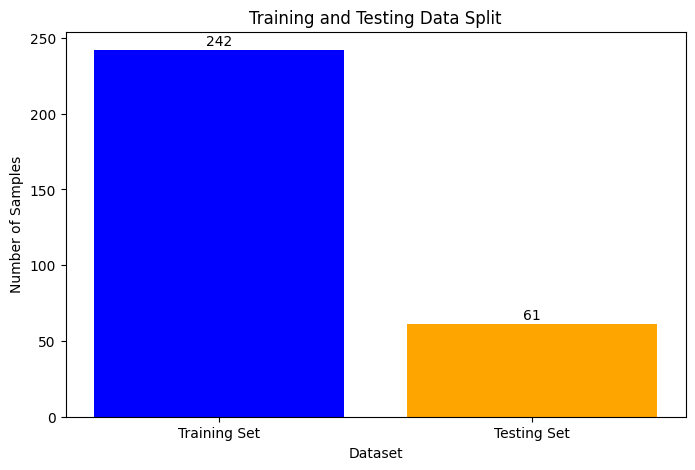

In [25]:
import matplotlib.pyplot as plt

labels = ['Training Set', 'Testing Set']
sizes = [X_train.shape[0], X_test.shape[0]]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, sizes, color=['blue', 'orange'])

for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{size}', ha='center', va='bottom')

plt.title('Training and Testing Data Split')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.show()


### **Model Training and Evaluation**

In [26]:
print("\n----------------------------------------------------")
print("Model Training and Evaluation")
print("----------------------------------------------------")
print()

# Random Forest Model
print("\n----------------------------------------------------")
print("Random Forest Model")
print("----------------------------------------------------")
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, pred_rf) * 100
print(f"Accuracy: {acc_rf:.2f}%")
print("\nClassification Report:")
print(metrics.classification_report(y_test, pred_rf))

# Support Vector Machine (SVM) Model
print("\n----------------------------------------------------")
print("Support Vector Machine (SVM) Model")
print("----------------------------------------------------")
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
acc_svm = metrics.accuracy_score(y_test, pred_svm) * 100
print(f"Accuracy: {acc_svm:.2f}%")
print("\nClassification Report:")
print(metrics.classification_report(y_test, pred_svm))

# Gradient Boosting Model
print("\n----------------------------------------------------")
print("Gradient Boosting Model")
print("----------------------------------------------------")
gb = GradientBoostingClassifier(n_estimators=1000, random_state=0)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
acc_gb = metrics.accuracy_score(y_test, pred_gb) * 100
print(f"Accuracy: {acc_gb:.2f}%")
print("\nClassification Report:")
print(metrics.classification_report(y_test, pred_gb))



----------------------------------------------------
Model Training and Evaluation
----------------------------------------------------


----------------------------------------------------
Random Forest Model
----------------------------------------------------
Accuracy: 81.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


----------------------------------------------------
Support Vector Machine (SVM) Model
----------------------------------------------------
Accuracy: 68.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.48      0.58        27
           1       0.67      0.85      0.75        34

    accuracy        

### **Visualizing Accuracy Comparison**


----------------------------------------------------
Visualizing Accuracy Comparison
----------------------------------------------------



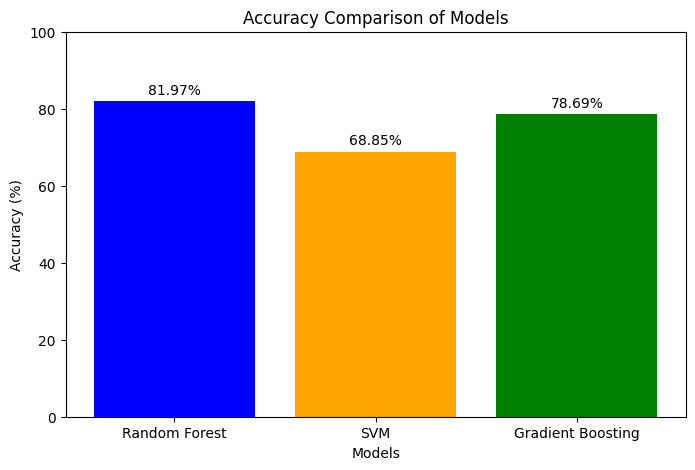

In [27]:
print("\n----------------------------------------------------")
print("Visualizing Accuracy Comparison")
print("----------------------------------------------------")
print()

models = ['Random Forest', 'SVM', 'Gradient Boosting']
accuracies = [acc_rf, acc_svm, acc_gb]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green'])

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

### **visualising and comparing the evaluation metrics**


----------------------------------------------------
Visualizing and comparing the evaluation metrics
----------------------------------------------------



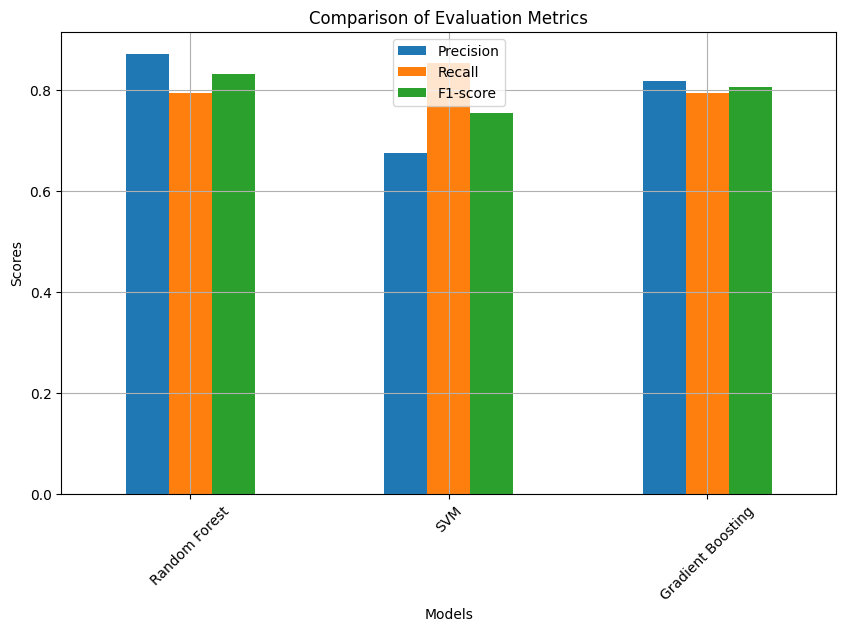

In [28]:
print("\n----------------------------------------------------")
print("Visualizing and comparing the evaluation metrics")
print("----------------------------------------------------")
print()

rf_metrics = {'Precision': metrics.precision_score(y_test, pred_rf, zero_division=1),
              'Recall': metrics.recall_score(y_test, pred_rf),
              'F1-score': metrics.f1_score(y_test, pred_rf)}

svm_metrics = {'Precision': metrics.precision_score(y_test, pred_svm, zero_division=1),
               'Recall': metrics.recall_score(y_test, pred_svm),
               'F1-score': metrics.f1_score(y_test, pred_svm)}

gb_metrics = {'Precision': metrics.precision_score(y_test, pred_gb, zero_division=1),
              'Recall': metrics.recall_score(y_test, pred_gb),
              'F1-score': metrics.f1_score(y_test, pred_gb)}

metrics_df = pd.DataFrame([rf_metrics, svm_metrics, gb_metrics], index=['Random Forest', 'SVM', 'Gradient Boosting'])

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Evaluation Metrics')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **Correlation Between Model Predictions**

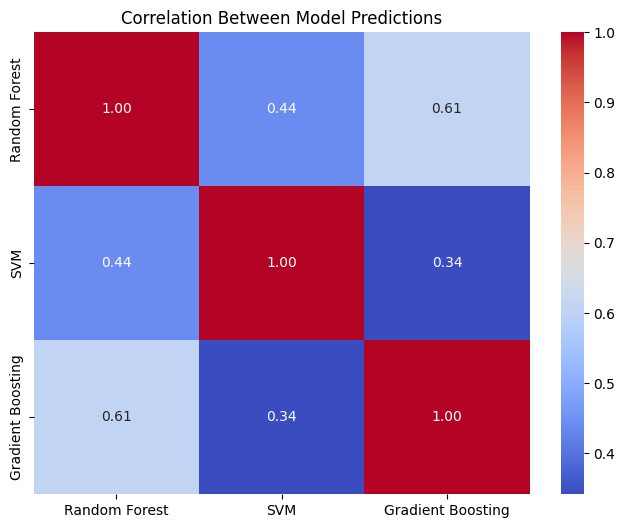

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions_df = pd.DataFrame({'Random Forest': pred_rf, 'SVM': pred_svm, 'Gradient Boosting': pred_gb})

corr_matrix = predictions_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Model Predictions')
plt.show()


### **Correlation Between Data Columns**

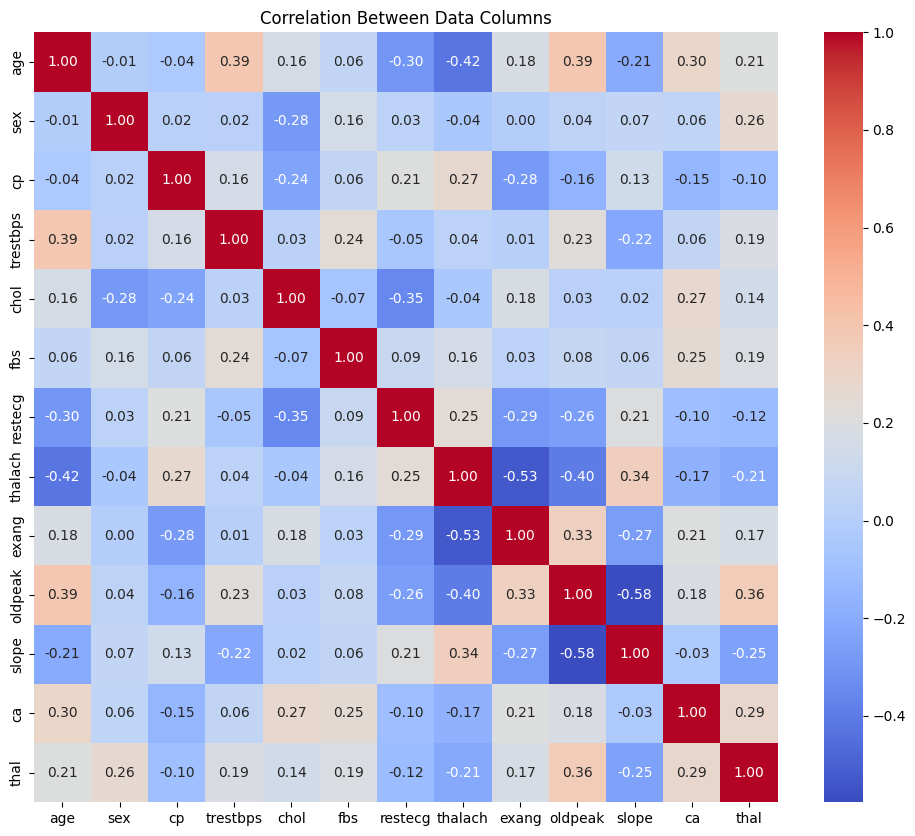

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_test.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Data Columns')
plt.show()


### **Disease Prediction**

In [31]:
print("\n----------------------------------------------------")
print("Disease Prediction")
print("----------------------------------------------------")
print()

data12 = np.array([[70,1,1,156,245,0,0,143,0,0,2,0,2]])

# Random Forest Model Prediction
predictions_rf = rf.predict(data12)
print("Random Forest Model Prediction:")
print(predictions_rf)

# SVM Model Prediction
predictions_svm = svm.predict(data12)
print("\nSVM Model Prediction:")
print(predictions_svm)

# Gradient Boosting Model Prediction
predictions_gb = gb.predict(data12)
print("\nGradient Boosting Model Prediction:")
print(predictions_gb)

print("\n------------------------------------------------------------")
print()


----------------------------------------------------
Disease Prediction
----------------------------------------------------

Random Forest Model Prediction:
[1]

SVM Model Prediction:
[0]

Gradient Boosting Model Prediction:
[1]

------------------------------------------------------------

